In [132]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.1/384.1 KB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 100.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# imdbmi Milestone 2

This notebook contains the preprocessing of raw data, some initial processing as well as some initial figures on which we base our analysis.

### Libraries used and imports

In [133]:
from collections import Counter
from typing import Union, Tuple
from pathlib import Path
import shutil
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

from ipywidgets import IntSlider, interact
%matplotlib inline




### Loading data

In [115]:
!ls /datasets/movie-summaries/

character.metadata.tsv	name.clusters.txt   README.txt
movie.metadata.tsv	plot_summaries.txt  tvtropes.clusters.txt


In [116]:
data_folder = '/datasets/movie-summaries/'
meta = data_folder + 'movie.metadata.tsv'

In [118]:
character_header = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
]
df_characters = pd.read_csv(data_folder + 'character.metadata.tsv', names=character_header, sep='\t')
df_characters

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [5]:
meta_data = pd.read_csv(meta, sep='\t', 
                        names=['Wikipedia Movie ID', 'Freebase Movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])

In [6]:
meta_data

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## Initial data visualizations

Here we plot the number of movies our dataset contains for each year. We see that the latest movie added is from 2016 and the first one from 1888.

Text(0.5, 1.0, 'Number of movies released each year')

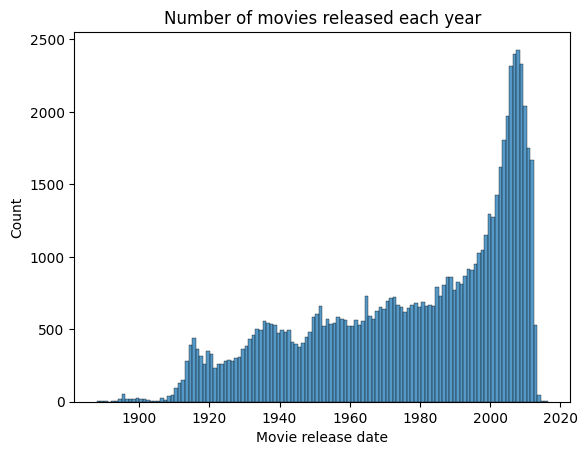

In [148]:
# create a column of movie release year
# maybe just represent just until 2015?
meta_data['Movie release date'] = pd.to_datetime(meta_data['Movie release date'],errors='coerce',format='%Y-%m-%d')
process_df = meta_data.copy()
process_df['Movie release year'] = process_df['Movie release date'].dt.year
sns.histplot(meta_data['Movie release date'], bins=2016-1888)
plt.title('Number of movies released each year')

### Gender analysis

In our dataset we have 33.23% of actresses, which generally corresponds w

In [162]:
df_time = df_characters[['Movie release date', 'Actor gender', 'Actor height (in meters)', 'Actor age at movie release']]
df_time = df_time[df_time['Movie release date'].notna()]
df_time['Year'] = pd.to_numeric(df_time['Movie release date'].str[:4])
df_time = df_time[(df_time['Year'] > 1800) & (df_time['Year'] < 2018)]

tot_actors = df_time['Actor gender'].count()
tot_women = df_time[df_time['Actor gender']=='F']['Actor gender'].count()
tot_men = df_time[df_time['Actor gender']=='M']['Actor gender'].count()
print("There are in total {} men and {} women out of {} actors in the entire dataset.".format(tot_men, tot_women, tot_actors)) 
print("This means that {:.2f}% of the actors are women.".format(100*tot_women/tot_actors))

There are in total 263892 men and 131307 women out of 395199 actors in the entire dataset.
This means that 33.23% of the actors are women.


Total men: 263892
Total woman: 131307


<AxesSubplot: title={'center': 'Number of actors by year per sex'}, xlabel='Year'>

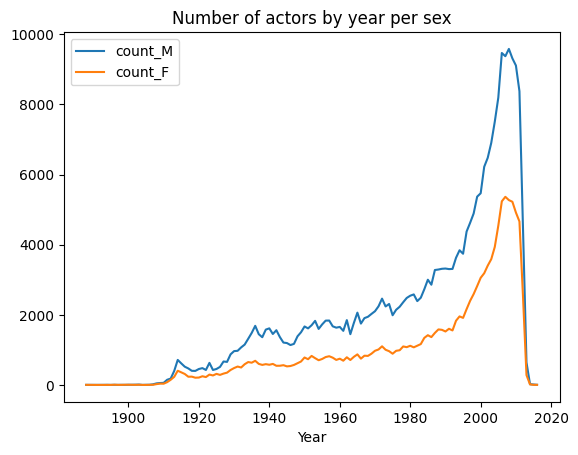

In [155]:
df_men_time = df_time[df_time['Actor gender']=='M']
df_men_time.insert(0, 'count_M', 1)
df_men_time = df_men_time.groupby(['Year']).sum()
print("Total men: {}".format(df_men_time['count_M'].sum()))

df_women_time = df_time[df_time['Actor gender']=='F']
df_women_time.insert(0, 'count_F',  1)
df_women_time = df_women_time.groupby(['Year']).sum()
print("Total woman: {}".format(df_women_time['count_F'].sum()))

df_actors_gender = pd.concat([df_men_time, df_women_time], axis=1)[['count_M', 'count_F']]
df_actors_gender = df_actors_gender.fillna(0)
df_actors_gender.head(10)

df_actors_gender.plot(title="Number of actors by year per sex")

We can observe from the plot, that the difference between male actors and women actors seems to increase drastically over time instead of decreasing.

Analyzing the actors age with regard to the gender

<AxesSubplot: title={'center': 'Average height of actors by year in meters'}, xlabel='Year'>

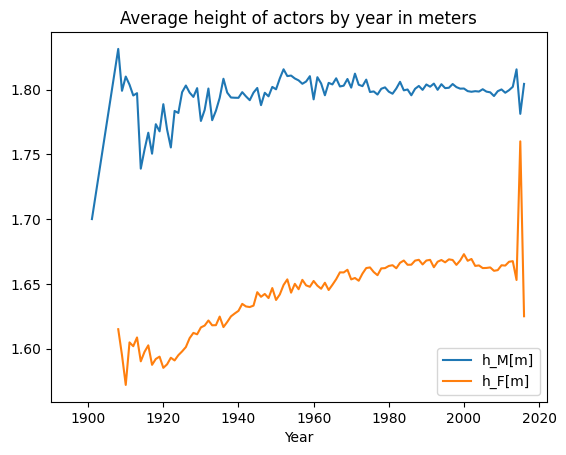

In [163]:
df_men_height = df_time[df_time['Actor gender']=='M']
df_men_height = df_men_height[(df_men_height['Actor height (in meters)'] > 0) & (df_men_height['Actor height (in meters)'] < 3)]
df_men_height = df_men_height[df_men_height['Actor height (in meters)'].notna()].groupby(['Year']).mean()
df_men_height = df_men_height.rename(columns={"Actor height (in meters)":"h_M[m]"})

df_women_height = df_time[df_time['Actor gender']=='F']
df_women_height = df_women_height[(df_women_height['Actor height (in meters)'] > 0) & (df_women_height['Actor height (in meters)'] < 3)]
df_women_height = df_women_height[df_women_height['Actor height (in meters)'].notna()].groupby(['Year']).mean()
df_women_height = df_women_height.rename(columns={"Actor height (in meters)":"h_F[m]"})

df_height_gender = pd.concat([df_men_height, df_women_height], axis=1)[['h_M[m]', 'h_F[m]']]
# df_height_gender = df_height_gender.fillna(0)

df_height_gender.plot(title="Average height of actors by year in meters")

We can observe on the plot above that the height of womens increased over time to approximately 1.67m compared as to the male actor

Checking the year 2000 for example.

Number of languages used in each year's movies.

Text(0.5, 0, 'Year')

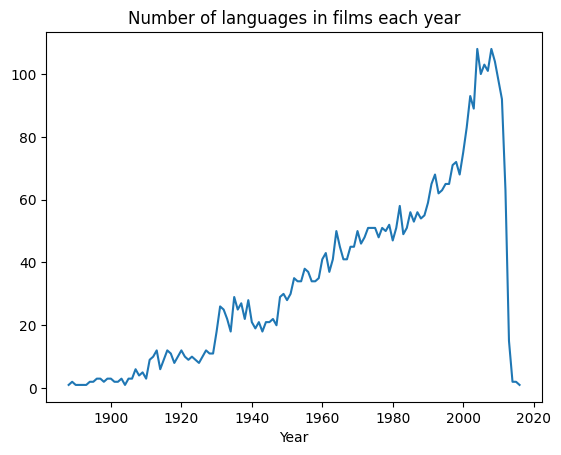

In [11]:
languange_dict = dict()
for year in range(year_start, year_end+1):
    movie_that_year = process_df[process_df['Movie release year'] == year]
    lans_list = []
    for row in movie_that_year.iterrows():
        langs = row[1]['Movie languages']
        if langs == '{}':
            continue
        lan_obj = json.loads(langs)
        for _, val in lan_obj.items():
            lans_list.append(val)
        lan_counts = dict(Counter(lans_list))
    languange_dict[year] = len(lan_counts)

plt.plot(languange_dict.keys(), languange_dict.values())
plt.title('Number of languages in films each year')
plt.xlabel('Year')

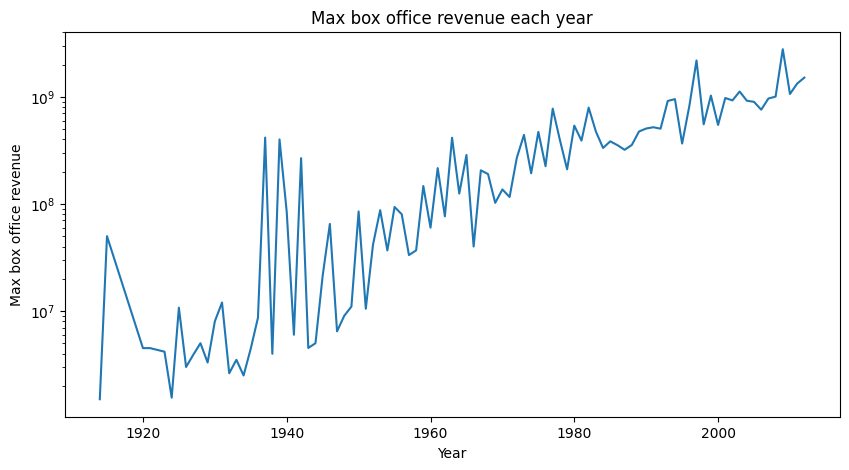

In [164]:
# Find the average box office revenue for each year
max_r = dict()
for year in years:
    movie_that_year = process_df[process_df['Movie release year'] == year]
    max_revenue = movie_that_year['Movie box office revenue'].max()
    max_r[year] = max_revenue
plt.figure(figsize=(10, 5))
plt.plot(max_r.keys(), max_r.values())
plt.title('Max box office revenue each year')
plt.xlabel('Year')
plt.ylabel('Max box office revenue')
plt.yscale('log')

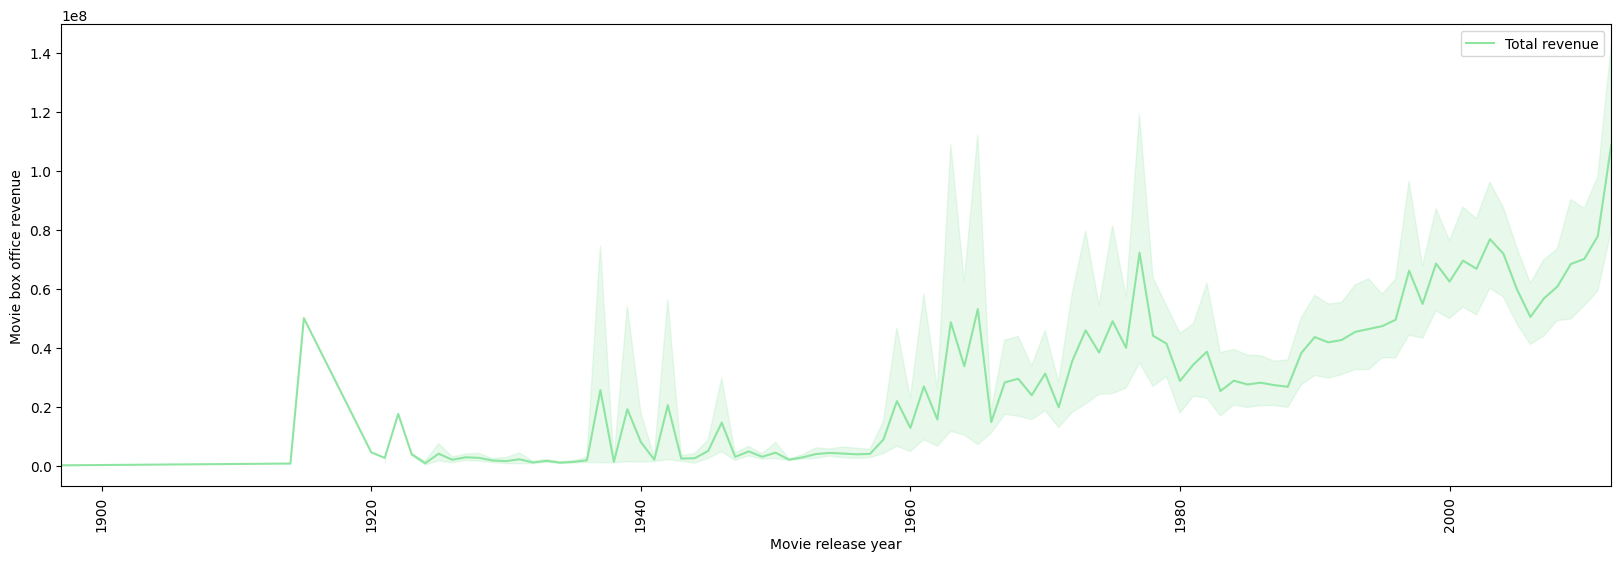

In [76]:
f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("pastel")
relase_revenue = process_df.copy()
relase_revenue = relase_revenue[relase_revenue["Movie release year"].notna() & relase_revenue["Movie box office revenue"].notna()]
min_year, max_year = relase_revenue["Movie release year"].min(), relase_revenue["Movie release year"].max()
years =  np.arange(0, max_year-+1, 1)
box = sns.lineplot(data=relase_revenue, x="Movie release year", y="Movie box office revenue", label="Total revenue", color="g")
for item in box.get_xticklabels():
    item.set_rotation(90)


xticks = np.arange(0, max_year-min_year+1, 5).astype(int)
# box.set_xticks(xticks)
# box.set_xticklabels([str(int(i+min_year)) for i in xticks])
box.set_xlim([min_year, max_year])
plt.show()

### Top Production Countries

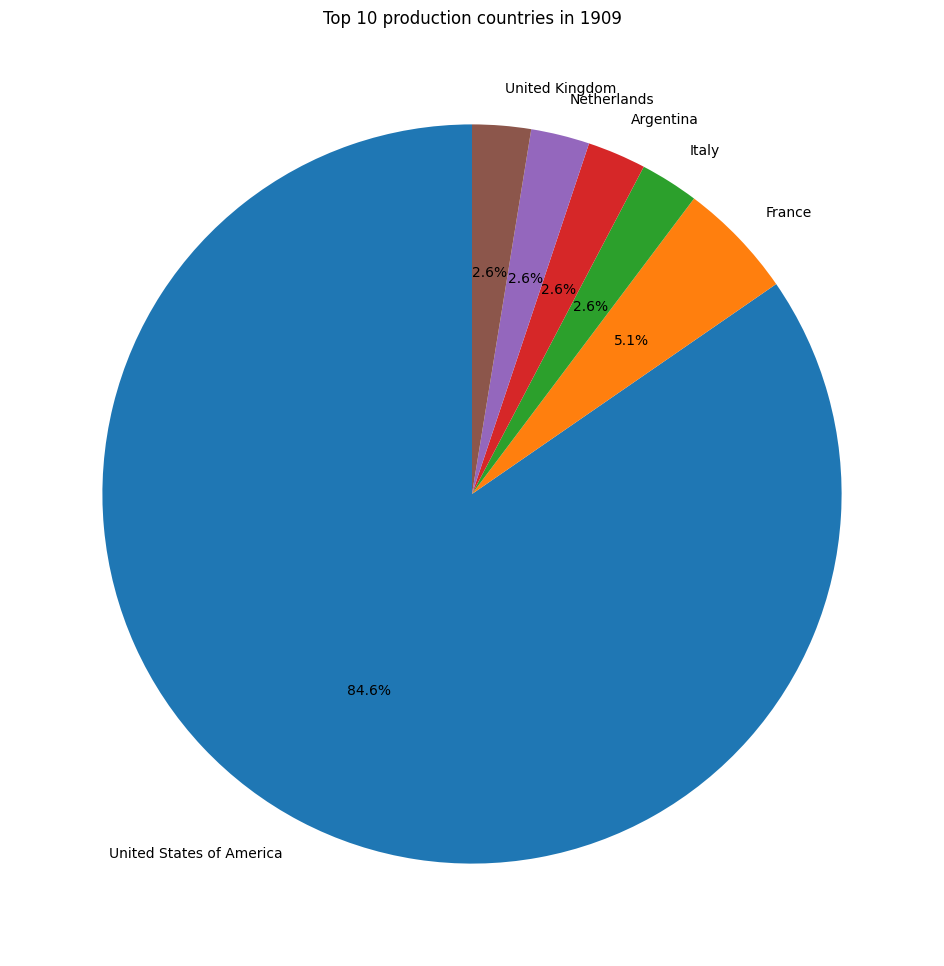

In [134]:
# year range of the data
year_start = int(process_df['Movie release year'].min())
year_end = int(process_df['Movie release year'].max())
def plot_year_pie(year):
    movie_that_year = process_df[process_df['Movie release year'] == year]
    country_list = []
    for row in movie_that_year.iterrows():
        country_raw = row[1]['Movie countries']
        if country_raw == '{}':
            continue
        country_obj = json.loads(country_raw)
        for _, val in country_obj.items():
            country_list.append(val)

    fig = plt.figure(figsize=(12, 12))
    country_counts = dict(Counter(country_list))
    sort_counts = sorted(country_counts.items(), key=lambda x: x[1], reverse=True)
    plt.pie([x[1] for x in sort_counts[:10]], labels=[x[0] for x in sort_counts[:10]], autopct='%1.1f%%', startangle=90)
    # plt.tight_layout()

    plt.title('Top 10 production countries in {}'.format(year))
        
plot_year_pie(1909)

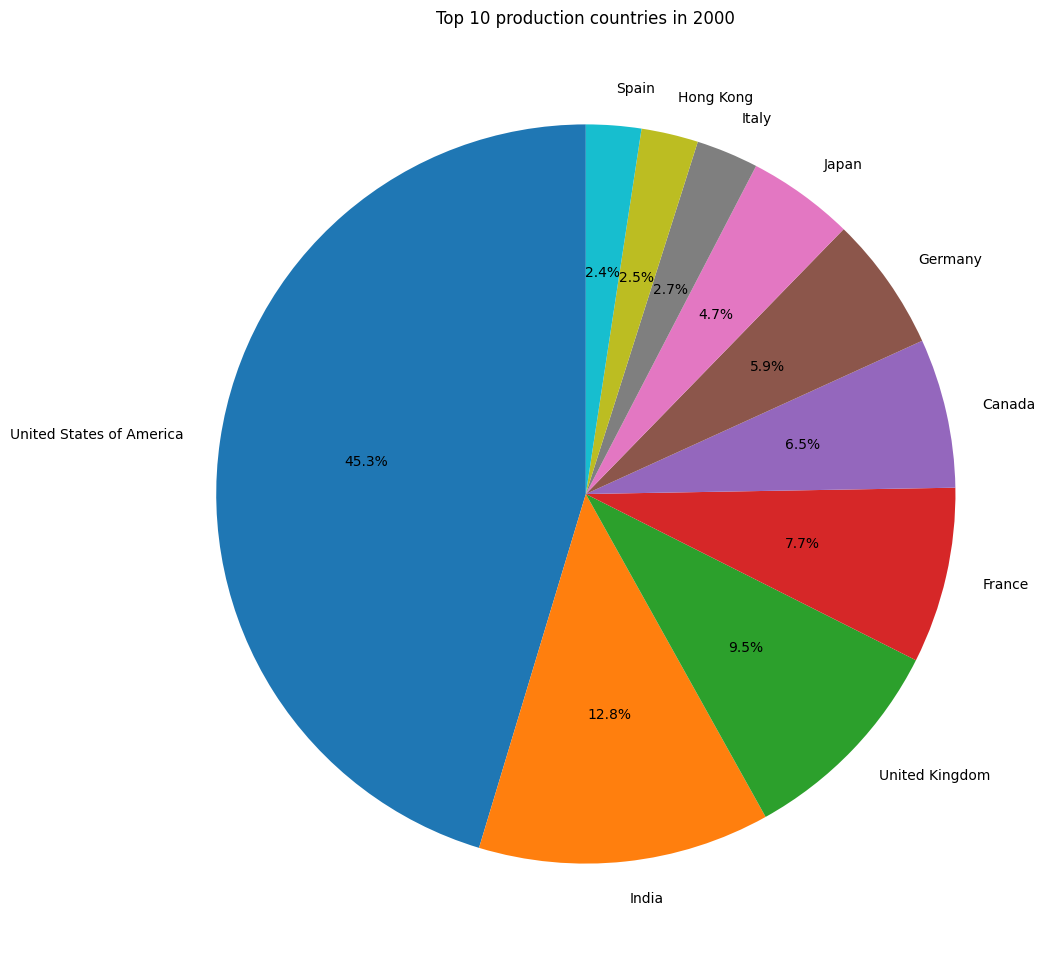

In [135]:
plot_year_pie(2000)

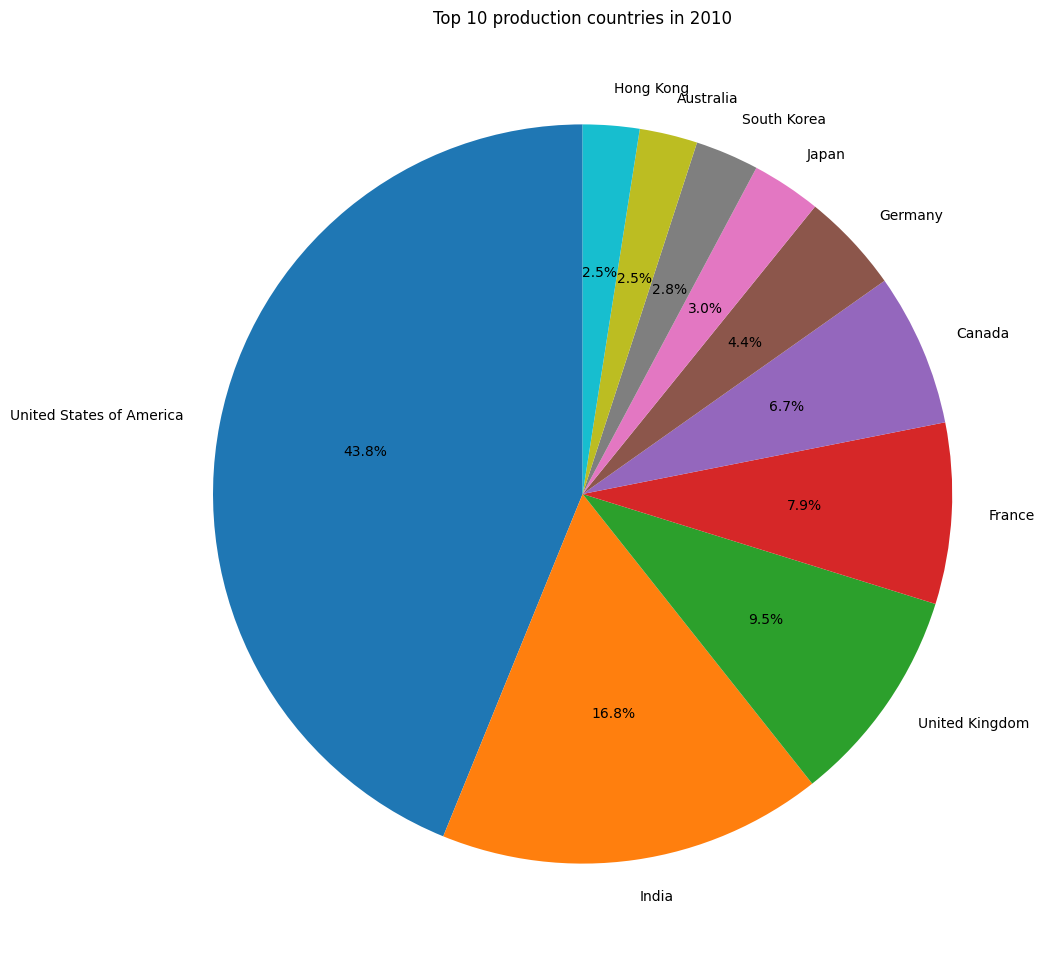

In [14]:
# sample output at 2010
plot_year_pie(2010)

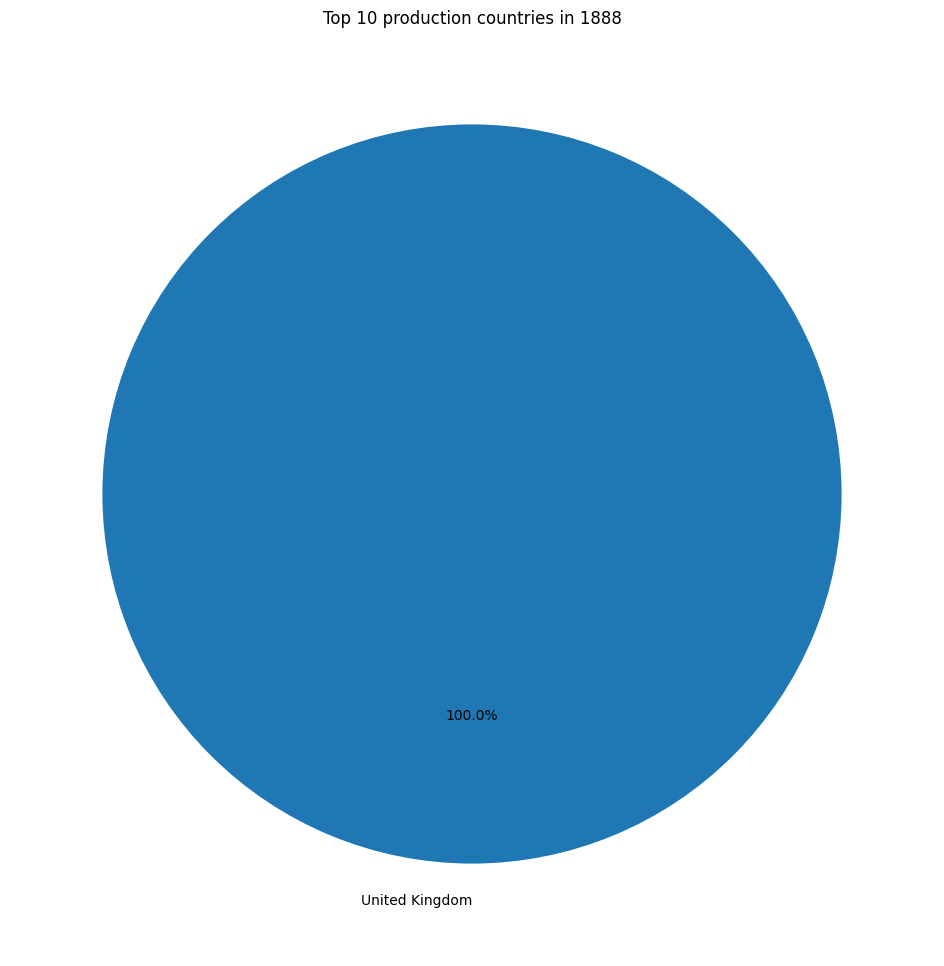

interactive(children=(IntSlider(value=1888, description='year', max=2016, min=1888), Output()), _dom_classes=(…

<function __main__.plot_year_pie(year)>

In [136]:
interact(plot_year_pie, year=IntSlider(min=year_start, max=year_end))

Output visualization
![countries](https://s4.gifyu.com/images/ezgif-4-522d51f571.gif)


### Language in movies across years

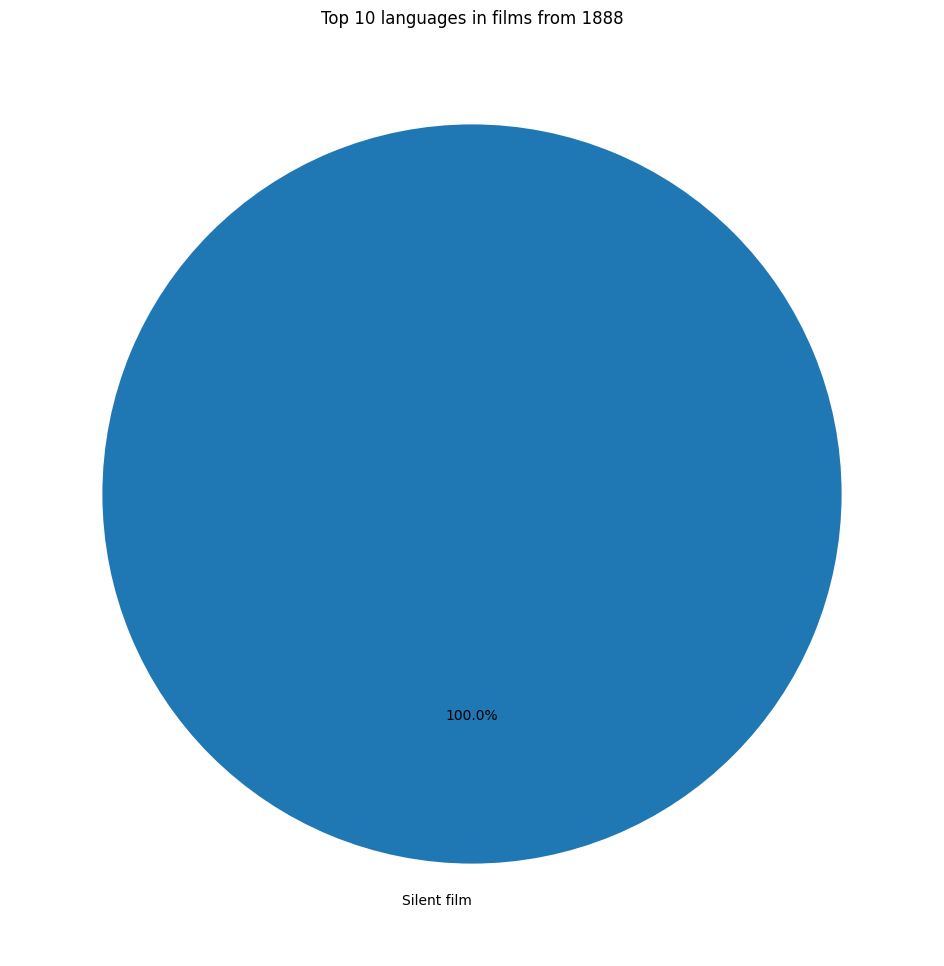

interactive(children=(IntSlider(value=1888, description='year', max=2016, min=1888), Output()), _dom_classes=(…

<function __main__.plot_lang_pie(year)>

In [140]:
def plot_lang_pie(year):
    movie_that_year = process_df[process_df['Movie release year'] == year]
    lang_list = []
    for row in movie_that_year.iterrows():
        language_raw = row[1]['Movie languages']
        if language_raw == '{}':
            continue
        lang_obj = json.loads(language_raw)
        for _, val in lang_obj.items():
            lang_list.append(val)

    fig = plt.figure(figsize=(12, 12))
    country_counts = dict(Counter(lang_list))
    sort_counts = sorted(country_counts.items(), key=lambda x: x[1], reverse=True)
    plt.pie([x[1] for x in sort_counts[:10]], labels=[x[0] for x in sort_counts[:10]], autopct='%1.1f%%', startangle=90)
    # plt.tight_layout()
    plt.title('Top 10 languages in films from {}'.format(year))
        

interact(plot_lang_pie, year=IntSlider(min=year_start, max=year_end))

The output result
![language](https://s1.gifyu.com/images/ezgif-4-f0a2f2778b.gif)

## Best selling movies & Gender ratio

In [124]:
col_names = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID']
characters = pd.read_csv('../MovieSummaries/character.metadata.tsv', delimiter='\t', names=col_names)
characters.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [143]:
best_selling_movie_id = dict()
for year in years:
    movie_that_year = process_df[process_df['Movie release year'] == year]
    max_revenue = movie_that_year['Movie box office revenue'].max()
    best_selling_movie_id[year] = movie_that_year[movie_that_year['Movie box office revenue'] == max_revenue]['Wikipedia Movie ID'].values[0]

In [145]:
# Find all the years in the procss_df withouth NaN data
analysis_data = process_df.dropna()
years = set()
for year in analysis_data['Movie release year']:
    years.add(year)
years = list(years)

Text(0.5, 1.0, 'Gender ratio of the best selling movie each year')

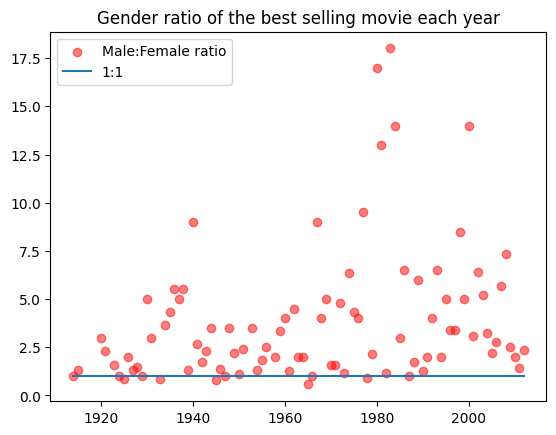

In [146]:
# male female ratio of the best selling movie each year
ratio = dict()
for year in years:
    movie_id = best_selling_movie_id[year]
    best_movie_characters = characters[characters['Wikipedia movie ID'] == movie_id]
    if len(best_movie_characters) != 0 and \
        len(best_movie_characters[best_movie_characters['Actor gender'] == 'F']) != 0 \
            and len(best_movie_characters[best_movie_characters['Actor gender'] == 'M']) != 0:
        ratio[year] = len(best_movie_characters[best_movie_characters['Actor gender'] == 'M']) / (len(best_movie_characters[best_movie_characters['Actor gender'] == 'F']))

plt.scatter(ratio.keys(), ratio.values(), color='red', alpha=0.5, label='Male:Female ratio')
plt.plot(ratio.keys(), np.ones(len(ratio.keys())), label='1:1')
plt.legend()
plt.title('Gender ratio of the best selling movie each year')

## Best selling & Ethnicity

In [95]:
# Build the dictionary for ethnicity and Freebase ID
map = pd.read_csv('ethnicity.csv')
ethnic_dict = dict()
for i in range(len(map)):
    ethnic_dict[map['Unnamed: 0'][i]] = map['Ethnicity'][i]

In [99]:
ethnic_dict['/m/05q747b']

'Croatian Chilean'

# Further Data Collection & Processing

Note: We run the cells below on separate notebooks during the processing and data collection, since they take quite some time. Here we show the resulting dataframes only. You can check the processed dataset at [here](https://drive.google.com/drive/folders/1FycaszmTdI2UjO06tgsg5nqvtpLG_z4s?usp=sharing).

## Collecting data from Wikidata

Methodology: For each movie in the our database, we send a query to Wikidata using its Freebase ID. 
If we can retrieve a single result, we record the included Wikidata URI and send another GET request and record everyting as a JSON file.
We also record a dataframe index by Freebase ID consisting of Wikidata URI, Wikidata ID and IMDb ID.

### Variables

In [87]:
WIKIPEDIA_QUERY_URL = 'https://query.wikidata.org/sparql'

QUERY_PAYLOAD = ''.join([
'SELECT DISTINCT ?item ?itemLabel WHERE {{',
'  SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}',
'  {{',
'    SELECT DISTINCT ?item WHERE {{',
'      ?item p:P646 ?statement0.',
'      ?statement0 (ps:P646) "{0}".',
'    }} LIMIT 100',
'  }}',
'}}'])

SRC_PATH = 'data/MovieSummaries/'
DST_PATH = './wikidata/'

USER_AGENT = 'akgokce'

### Helper functions

In [ ]:
def post_query(freebase_id:str) -> dict:
    '''
    Posts a query to Wikidata and returns the response as a dict.
    '''
    query = QUERY_PAYLOAD.format(freebase_id)
    r = requests.post(WIKIPEDIA_QUERY_URL, data={'format':'json', 'query':query}, headers={'User-Agent': USER_AGENT})
    return r.json()

def get_wikidata(wikidata_uri: str) -> dict:
    r = requests.get(wikidata_uri, headers={'User-Agent': USER_AGENT})
    return r.json()

def get_imdb_id(wikidata: dict, wikidata_id: str) -> str:
    '''
    Read a Wikidata JSON response and return IMDb ID.
    '''
    try:
        claims = wikidata.get('entities').get(wikidata_id).get('claims')
        imdb_id = claims.get('P345')[0].get('mainsnak').get('datavalue').get('value')
        return imdb_id
    except:
        return None

def get_wikidata_ids(freebase_id:str) -> str:
    '''
    Using SPARQL statements, posts a query to Wikidata and returns URI.
    '''
    try:
        response = post_query(freebase_id)
        results = response.get('results').get('bindings')
        if len(results)==0:
            print(f'No movies found for {freebase_id}')
            raise Exception
        elif len(results)>=2:
            print(f'Multiple movies found for {freebase_id}')
            raise Exception
        wikidata_uri = results[0].get('item').get('value')
        return wikidata_uri
    except:
        print(f'Failed to process the response for {freebase_id}')
        return None


def process_wikidata(wikidata_uri: str, save_json:bool = None):
    '''
    Given a Wikidata URI, send a GET request and process the response, returning Wikidata URI, Wikidata ID and IMDb ID if possible.
    '''
    try:
        wikidata_id = wikidata_uri.split('/')[-1]
        response = get_wikidata(wikidata_uri)
        if save_json:
            with open(dst_path.joinpath(wikidata_id+'.json'), 'w') as file:
                json.dump(response, file, indent=2)
        imdb_id = get_imdb_id(response, wikidata_id)
        return (wikidata_uri, wikidata_id, imdb_id)
    except:
        print(f'Failed to a response for {wikidata_uri}')
        return (None, None, None)

### Get data from Wikipedia

In [ ]:
wikipedia_data = dict()
failed_list = []
for freebase_id in tqdm(movie['Freebase movie ID']):
    wikidata_uri = get_wikidata_ids(freebase_id)
    if wikidata_uri is None:
        failed_list.append(freebase_id)
        continue
        
    _, wikidata_id, imdb_id = process_wikidata(wikidata_uri, True)
    wikipedia_data[freebase_id] = wikidata_uri, wikidata_id, imdb_id

### Convert to DataFrame and save as CSV

In [ ]:
df_wiki = pd.DataFrame.from_dict(wikipedia_data, orient='index', columns=['Wikidata URI', 'Wikidata ID', 'IMDb ID'])
df_wiki.to_csv('wikipedia_ids.csv')

In [85]:
df_wiki = pd.read_csv('wikipedia_ids.csv')
df_wiki.head(5)

,Unnamed: 0,Wikidata URI,Wikidata ID,IMDb ID
0,/m/03vyhn,http://www.wikidata.org/entity/Q261700,Q261700,tt0228333
1,/m/08yl5d,http://www.wikidata.org/entity/Q16250726,Q16250726,tt0245916
2,/m/0crgdbh,http://www.wikidata.org/entity/Q4978832,Q4978832,tt0094806
3,/m/0285_cd,http://www.wikidata.org/entity/Q7995657,Q7995657,tt0094320
4,/m/01mrr1,http://www.wikidata.org/entity/Q869644,Q869644,tt0083949


### FreebaseID to Ethnicity

In [88]:
# Adapted from https://edstem.org/eu/courses/134/discussion/8415

query = '''SELECT ?item ?freebaseID ?name WHERE {
  ?item p:P646 [ps:P646 ?freebaseID]. #get the freebaseID
  ?item rdfs:label ?name.             #get the name of the enthnic group
  ?item p:P31 [ps:P31 wd:Q41710].     #get only the items whose "instance of" is "ethnic group"
  filter(lang(?name) = "en")          #get the names in english
}'''

r = requests.post(WIKIPEDIA_QUERY_URL, data={'format':'json', 'query':query}, headers={'User-Agent': USER_AGENT})
response = r.json()

In [89]:
freebaseID_ethnicity = {}

for entry in response['results']['bindings']:
    freebaseID = entry['freebaseID']['value']
    ethnicity = entry['name']['value']
    wikidata_uri = entry['item']['value']
    freebaseID_ethnicity[freebaseID] = (ethnicity, wikidata_uri)

In [92]:
df_ethnicity = pd.DataFrame.from_dict(freebaseID_ethnicity, orient='index', columns=['Ethnicity', 'Wikidata URI'])
df_ethnicity.to_csv('ethnicity.csv')

In [93]:
df_ethnicity = pd.read_csv('ethnicity.csv')
df_ethnicity.head(5)

,Unnamed: 0,Ethnicity,Wikidata URI
0,/m/03c8vzn,Czech Canadians,http://www.wikidata.org/entity/Q3498126
1,/m/04g1jdt,Chagatai people,http://www.wikidata.org/entity/Q3501965
2,/m/05q747b,Croatian Chilean,http://www.wikidata.org/entity/Q3503021
3,/m/0g6k0p,Croatian Peruvian,http://www.wikidata.org/entity/Q3503027
4,/m/047d03w,Croatian Brazilian,http://www.wikidata.org/entity/Q3507533


## Subtitle Processing

Methodology: We first check that whether we can the folder name in our dataset as an IMDb ID of a movie.
For each subtiitle that is matched with a movie, we then read each subtitle XML file using BeautifulSoup package and write clean sentences into a txt file.

### Variables

In [ ]:
INPUT_DIR = 'en/OpenSubtitles/xml/en/'
OUTPUT_DIR = './subtitles/'
WIKIDATA_PATH = 'wikipedia_ids.csv'

### Helper Functions

In [ ]:
def xml2txt(xml_path: Union[Path, str], txt_path: Union[Path, str]) -> None:
    '''
    Opens an XML files using BeautifulSoup package, 
    reads every sentence by removing the tags 
    and writes every sentence to a new line into a txt file
    '''
    with open(xml_path, 'r', encoding='utf8') as f:
        data = f.read()

    Bs_data = BeautifulSoup(data, 'xml')
    
    text = []

    sentences = Bs_data.find_all('s')
    for sen in sentences:
        words = sen.find_all('w')
        sen = ' '.join([w.next_element for w in words])
        text.append(sen+'\n')
        
    with open(txt_path, 'w', encoding='utf8') as f:
        f.writelines(text)
        
        
def imdb_id_corrector(imdb_id:str) -> Union[str, None]:
    if len(imdb_id) > 7:
        # Folder names longer than 7 character do not seem to correspond to a correct IMDb ID
        return None

    additional_zeros = '0' * max(0, 7-len(imdb_id))
    imdb_id = 'tt' + additional_zeros + imdb_id
    
    return imdb_id


def check_imdb_id(test_id, imdb_id_list):
    '''
    Check if the folder name is in our dataset.
    '''
    for imdb_id in imdb_id_list:
        if test_id in imdb_id:
            return imdb_id
    return None

Based on manual inspection, we observed that folder names longer than 7 character do not seem to correspond to a correct IMDb ID. Hence we discard all the folders with name length more than 7.
Furthermore, IMDb ID follows the convention `tt*` where `*` is a squence of number with length either 7 or 8 [ref](https://en.wikipedia.org/wiki/Template:IMDb_title#:~:text=https%3A%2F%2Fwww.imdb.com,work%20if%20it%20is%20included).
Hence we add leading zeros if the length of a folder name is less than 7 to obtain an appropriate ID.

We do not convert letters to lowercase or remove punctuations. These should be dealt with at the beginning of an NLP pipeline.

Do not process all them, only process if a candidate IMDb ID is contained in our movie dataset.

### Process subtitles

In [100]:
input_dir = Path(INPUT_DIR)
output_dir = Path(OUTPUT_DIR)
wikidata_path = Path(WIKIDATA_PATH)

if not output_dir.exists():
    output_dir.mkdir()
    

wikidata = pd.read_csv(wikidata_path)
imdb_id_list = wikidata['IMDb ID']
imdb_id_list = imdb_ids[imdb_id_list.notna()]


io_map  = {}

# Find all the subtitles that matches a movie in our dataset
for year_folder in tqdm(list(input_dir.iterdir())):
    for movie_folder in tqdm(list(year_folder.iterdir()), leave=False):
        sub_path = next(movie_folder.glob('*.xml'))

        
        movie_id = movie_folder.stem
        imdb_id = check_imdb_id(movie_id, imdb_id_list)
        if imdb_id is None:
            continue

        
        txt_path = output_dir.joinpath(imdb_id+'.txt')
        
        io_map[imdb_id] = [sub_path, txt_path]

In [ ]:
# Convert subtitles
for imdb_id, (subtitle_path, txt_path) in tqdm(io_map.items()):
    xml2txt(subtitle_path, txt_path)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6342486f-cd0b-4194-bb16-3e6357541798' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>